# **Prerequsite test**

Name: Chirag Sarda <br>
Roll No.: 20110047

# Question 1

Number of multiplication is $n \times m\times k$<br> 
Number of addition is $n \times m \times (k-1)$
<br>
say $n = 1, k = 3, m = 2$ and the matrix be
\begin{bmatrix}
a & b & c
\end{bmatrix}
<br>
\begin{bmatrix}
d & e \\
f & g \\
h & i
\end{bmatrix}
the resultant matrix is 
\begin{bmatrix}
ad + bf + ch & ae + bg + ci\\
\end{bmatrix}
here the number of multilications is: $6 = 1\times2\times3(n \times m\times k)$<br>
here the number of additions is: $4 = 1\times2\times(3-1)(n \times m\times (k-1))$

# Question 2

In [147]:
import numpy as np
import time

In [148]:
# matric muultiplication by standard method (o(n^3))
def matrix_multiplication(a, b):
    result = [0]* len(a)
    for i in range(len(a)):
        result[i] = [0]*len(b[0])
    for i in range(len(result)):
        for j in range(len(result[0])):
            for k in range(len(b)):
                result[i][j] += a[i][k]*b[k][j]
    # print(result)
    return result
  
# matrix multiplcation by numpy
def matrix_multiplication_numpy(a,b):
    return np.dot(na,nb)

In [149]:
import random
# creating the random matrix
n = 100
k = 15
m = 25
a = [[random.randint(0, 1) for j in range(k)] for i in range(n)]
b = [[random.randint(0, 1) for j in range(m)] for i in range(k)]

In [150]:
%%timeit -n 100
resultant_matrix = matrix_multiplication(a, b)
# print(resultant_matrix)

10.1 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [151]:
# converting in numpy arraay
na = np.array(a)
nb = np.array(b)

In [152]:
%%timeit -n 100
resultant_matrix = matrix_multiplication_numpy(a, b)
# print(resultant_matrix)

89.2 µs ± 47.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The above result shows that numpy multiplication takes lower time while standard matric multilication takes more time

# Question 3

The pass method will take $ o(n^2) $ as it will take approx $n/2$ pass to get the median, hence $n^2$
<br>
Better method is first sort the array which will take $o(nlogn)$ then we can find the median in $o(1)$ time,

In [153]:
# time complexity = o(n^2) median by pass
def median_pass_method(a):
  _median = 0
  # partially sorting in decreasing oreder
  for i in range(len(a)):
      current_max = a[i]
      current_max_position = i
      for  j in range(i+1, len(a)):
          if a[j] > current_max:
              current_max = a[j]
              current_max_position = j
      a[i], a[current_max_position] = a[current_max_position], a[i]
      # now a[i] will give the i + 1 th highest
      if i == len(a)//2:
          if len(a)%2 == 0:
              _median = (a[len(a)//2] + a[len(a)//2 - 1])/2
          else:
              _median = a[len(a)//2] 
          break
  return _median

# time complexity = o(nlogn) 
def median_sort_method(a):
  # median by sorting
  a.sort()
  _median = 0
  if(len(a)%2 == 0): # lenght is even
      _median = (a[len(a)//2] + a[(len(a)//2) - 1])/2
  else:
      _median = a[(len(a)//2)]
  return _median

# median by numpy 
def median_numpy(a):
  return np.median(a)


In [154]:
no_of_element = 100
median_list = [random.randint(0, 10000)  for i in range(no_of_element)]
# median_list

In [155]:
%%timeit -n 100
# median by pass method
_median = median_pass_method(median_list)
# print(_median)

282 µs ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [156]:
%%timeit -n 100
# medina by sort method
_median = median_sort_method(median_list)
# print(_median)

1.22 µs ± 123 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [157]:
n_median_list = np.array(median_list)

In [158]:
%%timeit -n 100
_median = median_numpy(n_median_list)
# print(_median)

The slowest run took 4.89 times longer than the fastest. This could mean that an intermediate result is being cached.
44.2 µs ± 29.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The above result shows that median by numpy is slower then sorting method while the pass method is slowest

# QUESTION 4

Gradient with respect to x: $2xy + y^3cos(x)$
<br>
Gradient with respect to y: $x^2 + 3y^3sin(x)$
    

# Question 5

In [159]:
import jax
import numpy as np

# given fucntion
def f(x, y):
  return (x**2)*y + (y**3)*jax.numpy.sin(x) 

# analytical gradient with respect to x
def fx(x, y):
  return 2*x*y + (y**3)*jax.numpy.cos(x)

# analytical gradient with respect to y
def fy(x, y):
  return x**2 + 3*(y**2)*jax.numpy.sin(x)

# random values for test
x = np.random.random([5])
y = np.random.random([5])
# print(x, y)

# jax gradient method
numerical_grad_x = jax.grad(f,argnums = 0) # with respect to x
numerical_grad_y = jax.grad(f,argnums =1) # with respect to y

print("Analyticla gradient:")
for i in range(len(x)):
  print(fx(x[i], y[i]), fy(x[i], y[i]))

print("\nNumerical gradient:")
for i in range(len(x)):
  print(numerical_grad_x(x[i], y[i]), numerical_grad_y(x[i], y[i]))

Analyticla gradient:
0.15996413 0.03490072
0.58489573 1.0775102
0.05166874 0.35935205
0.09116794 0.013529514
0.8125278 1.2154531

Numerical gradient:
0.15996413 0.03490072
0.58489573 1.0775102
0.051668745 0.35935205
0.09116794 0.013529514
0.8125278 1.2154531


# Question 6

In [160]:
import sympy

x , y = sympy.symbols('x y')
func = (x**2)*y + (y**3)*sympy.sin(x)

#Differentiating partially w.r.t x
derivative_f_x = func.diff(x)
#Differentiating partially w.r.t y
derivative_f_y = func.diff(y)

print(derivative_f_x)
print(derivative_f_y)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


# Question 7

In [161]:
student_records = {
    2022: {
        "Branch 1":
            {
                1: {
                    "Name": "Chirag",
                    "Roll Number": 20110047,
                    "Marks": {
                        "Math": 100,
                        "English": 100,
                        "Science": 100
                    }
                },
             2: {
                    "Name": "xyz",
                    "Roll Number": 2011004745,
                    "Marks": {
                        "Math": 0,
                        "English": 0,
                        "Science": 0
                    }
                }
            },
        "Branch 2": {}
    },
    2023: {
      "Branch 1": {},
      "Branch 2": {}  
    },
    2024: {
      "Branch 1": {},
      "Branch 2": {}  
    },
    2025: {
      "Branch 1": {},
      "Branch 2": {}  
    }
}
print(student_records)

{2022: {'Branch 1': {1: {'Name': 'Chirag', 'Roll Number': 20110047, 'Marks': {'Math': 100, 'English': 100, 'Science': 100}}, 2: {'Name': 'xyz', 'Roll Number': 2011004745, 'Marks': {'Math': 0, 'English': 0, 'Science': 0}}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


# Question 8

In [162]:
class Student_Database:
    def __init__(self):
        self.years = []

class Year:
    def __init__(self):
        self.branches = []

class Branch:
    def __init__(self):
        self.students = []

class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.marks = marks
        self.roll_number = roll_number
        

# creating the student database object
st_db = Student_Database()

# creating the year object y2022, that will be put in st_db object's year list
y2022 = Year()
st_db.years.append(y2022)

# creating the branch object branch1, that will be put in y2022 object's branch list
branch1 = Branch()
y2022.branches.append(branch1)

# creating the student object s that will put in above branch 1
s = Student("Chirag",20110047,{"English": 100, "Maths": 100, "Science":100})
branch1.students.append(s)

marks = st_db.years[0].branches[0].students[0].name
print(marks)

Chirag


# Question 9

In [163]:
#  x = 0.5 to 100.0 in steps of 0.5
abscissa = []
step = 0.5
while step <= 100:
    abscissa.append(step)
    step += 0.5

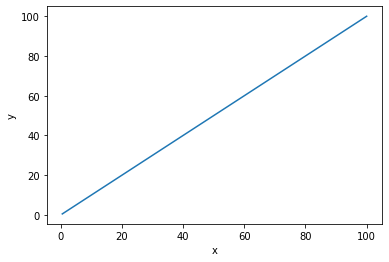

In [164]:
import matplotlib.pyplot as plt
import math

# 1: y = x

# finding the y coordinate
def f1(abscissa):
    coordinate = []
    for i in abscissa:
        coordinate.append(i)
    return coordinate

# y coordinate list
coordinate = f1(abscissa)

# plotting the curve
plt.plot(abscissa,coordinate)
plt.xlabel('x')
plt.ylabel('y')

# displaying the curve
plt.show()


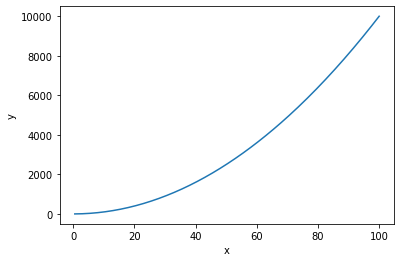

In [165]:
#2: y = x^2
def f2(abscissa):
    coordinate = []
    for i in abscissa:
        coordinate.append(i*i)
    return coordinate

coordinate = f2(abscissa)
plt.plot(abscissa,coordinate)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

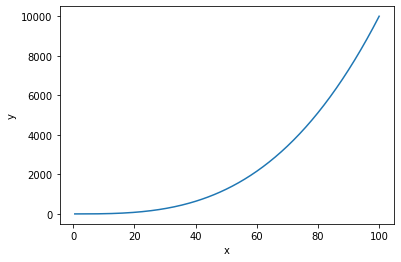

In [166]:

# 3: y = x^3/100
def f3(abscissa):
    coordinate = []
    for i in abscissa:
        coordinate.append((i*i*i)/100)
        
    return coordinate

coordinate = f3(abscissa)
plt.plot(abscissa,coordinate)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

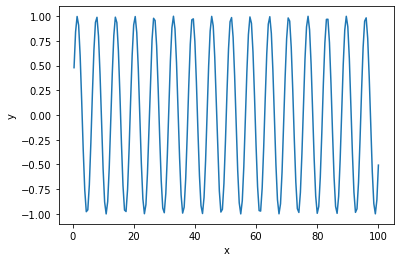

In [167]:

# 4: y = sin(x)
def f4(abscissa):
    coordinate = []
    for i in abscissa:
        coordinate.append(math.sin(i))
    return coordinate

coordinate = f4(abscissa)
plt.plot(abscissa,coordinate)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

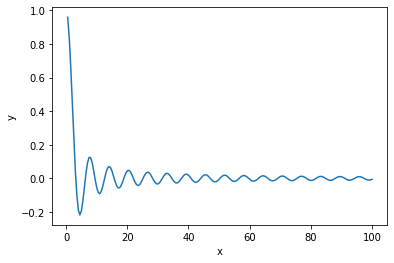

In [168]:
# 5: y = sin(x)/x
def f5(abscissa):
    coordinate = []
    for i in abscissa:
        coordinate.append((math.sin(i))/i)      
        
    return coordinate

coordinate = f5(abscissa)
plt.plot(abscissa,coordinate)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

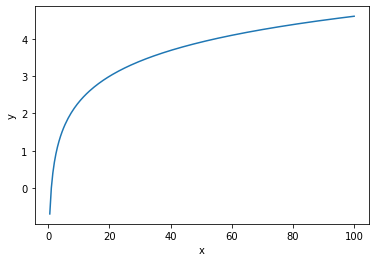

In [169]:
# 6: y = log(x)
def f6(abscissa):
    coordinate = []
    for i in abscissa:
        coordinate.append(math.log(i))
    return coordinate

coordinate = f6(abscissa)
plt.plot(abscissa,coordinate)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

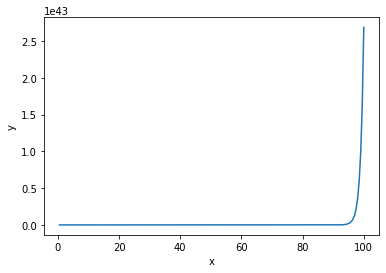

In [170]:
# 7: y = e^x
def f7(abscissa):
    coordinate = []
    for i in abscissa:
        coordinate.append(math.exp(i))      
    return coordinate

coordinate = f7(abscissa)
plt.plot(abscissa,coordinate)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Question 10

In [171]:
import pandas as pd

# generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2.
np_matrix = np.random.uniform(1, 2, size=(20, 5))
print(np_matrix)

[[1.59554889 1.39256027 1.51284719 1.66687502 1.748497  ]
 [1.55872625 1.03463902 1.79566703 1.16346863 1.22758643]
 [1.09191631 1.3133415  1.65284653 1.51784078 1.07428587]
 [1.00363189 1.99408116 1.56495453 1.51600685 1.83544591]
 [1.56658842 1.4316957  1.84915346 1.49113387 1.14877514]
 [1.86134081 1.44355859 1.7581986  1.7407746  1.19754036]
 [1.43149827 1.70393162 1.29420299 1.61781007 1.72965431]
 [1.49624004 1.99569108 1.7527112  1.47005013 1.82997477]
 [1.98618928 1.85503225 1.48510488 1.39641898 1.11994893]
 [1.09841002 1.24629099 1.46165035 1.79471299 1.69021786]
 [1.46572818 1.98523611 1.17366791 1.22217575 1.99818447]
 [1.58694082 1.5850247  1.59218675 1.92245006 1.54607497]
 [1.96416761 1.12973151 1.60739593 1.01381395 1.88537763]
 [1.6706858  1.24196373 1.11679635 1.74232957 1.0602831 ]
 [1.9486216  1.96901299 1.23875558 1.01913586 1.62858936]
 [1.55901275 1.97914842 1.80500294 1.50183831 1.48280785]
 [1.87862008 1.47826556 1.02365666 1.82753461 1.85539066]
 [1.9008893  1

In [172]:
# create a dataframe out of the np_matrix with the columns name as “a”, “b”, “c”, “d”, “e”
df = pd.DataFrame(np_matrix, columns=["a", "b", "c", "d", "e"])
print(df)

           a         b         c         d         e
0   1.595549  1.392560  1.512847  1.666875  1.748497
1   1.558726  1.034639  1.795667  1.163469  1.227586
2   1.091916  1.313341  1.652847  1.517841  1.074286
3   1.003632  1.994081  1.564955  1.516007  1.835446
4   1.566588  1.431696  1.849153  1.491134  1.148775
5   1.861341  1.443559  1.758199  1.740775  1.197540
6   1.431498  1.703932  1.294203  1.617810  1.729654
7   1.496240  1.995691  1.752711  1.470050  1.829975
8   1.986189  1.855032  1.485105  1.396419  1.119949
9   1.098410  1.246291  1.461650  1.794713  1.690218
10  1.465728  1.985236  1.173668  1.222176  1.998184
11  1.586941  1.585025  1.592187  1.922450  1.546075
12  1.964168  1.129732  1.607396  1.013814  1.885378
13  1.670686  1.241964  1.116796  1.742330  1.060283
14  1.948622  1.969013  1.238756  1.019136  1.628589
15  1.559013  1.979148  1.805003  1.501838  1.482808
16  1.878620  1.478266  1.023657  1.827535  1.855391
17  1.900889  1.340169  1.669927  1.414817  1.

In [173]:
# the column (axis = 0) with the highest standard deviation. 
max_std_deviation_col  = df.std(axis=0).idxmax()
print(max_std_deviation_col)

b


In [174]:
# # the row (axis = 1) with the lowest mean. 
min_mean_row = df.mean(axis=1).idxmin()
print(min_mean_row)

2


# Question 11

In [175]:
# adding a new column to the above dataframe
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)
print(df)

           a         b         c         d         e         f
0   1.595549  1.392560  1.512847  1.666875  1.748497  7.916328
1   1.558726  1.034639  1.795667  1.163469  1.227586  6.780087
2   1.091916  1.313341  1.652847  1.517841  1.074286  6.650231
3   1.003632  1.994081  1.564955  1.516007  1.835446  7.914120
4   1.566588  1.431696  1.849153  1.491134  1.148775  7.487347
5   1.861341  1.443559  1.758199  1.740775  1.197540  8.001413
6   1.431498  1.703932  1.294203  1.617810  1.729654  7.777097
7   1.496240  1.995691  1.752711  1.470050  1.829975  8.544667
8   1.986189  1.855032  1.485105  1.396419  1.119949  7.842694
9   1.098410  1.246291  1.461650  1.794713  1.690218  7.291282
10  1.465728  1.985236  1.173668  1.222176  1.998184  7.844992
11  1.586941  1.585025  1.592187  1.922450  1.546075  8.232677
12  1.964168  1.129732  1.607396  1.013814  1.885378  7.600487
13  1.670686  1.241964  1.116796  1.742330  1.060283  6.832059
14  1.948622  1.969013  1.238756  1.019136  1.628589  7

In [176]:
# adding a column g with constraints
def f_adding_g(row):
    if row['f']< 8:
        return "LT8"
    return "GT8"
df["g"] = df.apply(f_adding_g, axis=1)
print(df)

           a         b         c         d         e         f    g
0   1.595549  1.392560  1.512847  1.666875  1.748497  7.916328  LT8
1   1.558726  1.034639  1.795667  1.163469  1.227586  6.780087  LT8
2   1.091916  1.313341  1.652847  1.517841  1.074286  6.650231  LT8
3   1.003632  1.994081  1.564955  1.516007  1.835446  7.914120  LT8
4   1.566588  1.431696  1.849153  1.491134  1.148775  7.487347  LT8
5   1.861341  1.443559  1.758199  1.740775  1.197540  8.001413  GT8
6   1.431498  1.703932  1.294203  1.617810  1.729654  7.777097  LT8
7   1.496240  1.995691  1.752711  1.470050  1.829975  8.544667  GT8
8   1.986189  1.855032  1.485105  1.396419  1.119949  7.842694  LT8
9   1.098410  1.246291  1.461650  1.794713  1.690218  7.291282  LT8
10  1.465728  1.985236  1.173668  1.222176  1.998184  7.844992  LT8
11  1.586941  1.585025  1.592187  1.922450  1.546075  8.232677  GT8
12  1.964168  1.129732  1.607396  1.013814  1.885378  7.600487  LT8
13  1.670686  1.241964  1.116796  1.742330  1.06

In [177]:
# the number of rows in the dataframe where the value in the column “g” is “LT8”. 
count = len(df.query("g == 'LT8'"))
print(count)

14


In [178]:
# the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” 
std_deviation_lt8 = df.query("g == 'LT8'")["f"].std()
print(std_deviation_lt8) 

0.4395100544285281


In [179]:
# the standard deviation of the column “f” for the rows where the value in the column “g” is “GT8” 
std_deviation_gt8 = df.query("g == 'GT8'")["f"].std()
print(std_deviation_gt8) 

0.3101682228467912


# Question 12

Broadcasting is method by we can perform the arithmatic operation between different numpy array of different shape as long as they are compatible

In [180]:
arr1 = np.zeros((4,4), dtype=int)
arr2 = np.arange(4)
print(arr1 + arr2)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]


In the above example $arr1$ is $4×4$ while $arr2$ $4×1$. there size is unequal but when we add them we get $4×4$ matrix, beacuse of brodcasting. Here numpy streches and duplicates the element in $arr2$ to $4×4$ matrx which is then added to $arr1$.

In [181]:
arr1 = np.zeros((4,4), dtype=int)
arr2 = np.arange(5)
# print(arr1 + arr2)

Here the $arr2$ is not compatible as $1×5$ can't be streched to $4×4$ so gives an error "operands could not be broadcast together with shapes (4,4) (5,)"

# Question 13

In [182]:
# generating the random numpy array 
np_arr = np.random.randint(0, 1000, size=(3, 2, 6))
print(np_arr)

[[[727 894 792  92 271 929]
  [306 475 250 664 616 403]]

 [[713 656 144 917 311 374]
  [306 751 874 571 627 655]]

 [[475 997 319 470 715 738]
  [559 293 496 226 996 623]]]


In [183]:
def my_argmin(np_array):
  # reshaping the np_array into 1 x n and findig the min 
  no_of_elements = np.size(np_array)
  new_np_array = np.reshape(np_array,(no_of_elements))
  print(new_np_array)
  
  min_element = new_np_array[0]
  min_index = 0
  for i in range(no_of_elements):
    if new_np_array[i] < min_element:
      min_element = new_np_array[i]
      min_index =  i
  # print(min_index)
  # print(min_element)
  return min_index


print("Result of my_argmin:", my_argmin(np_arr))
print("Result of inbuilt argmin:", np.argmin(np_arr))


[727 894 792  92 271 929 306 475 250 664 616 403 713 656 144 917 311 374
 306 751 874 571 627 655 475 997 319 470 715 738 559 293 496 226 996 623]
Result of my_argmin: 3
Result of inbuilt argmin: 3
